###DME_TOLUENE_VANLAAR_SRK EOS

Standard deviation of predicted pressures of DME & toluene system at T=323.15 K based on Van Laar equation and Soave- Redlich Kwong Equation of State from experimental results (J. Chem. Eng. Data 2007, 52, 5, 1814–1818) is 29.332466864184187 kPa


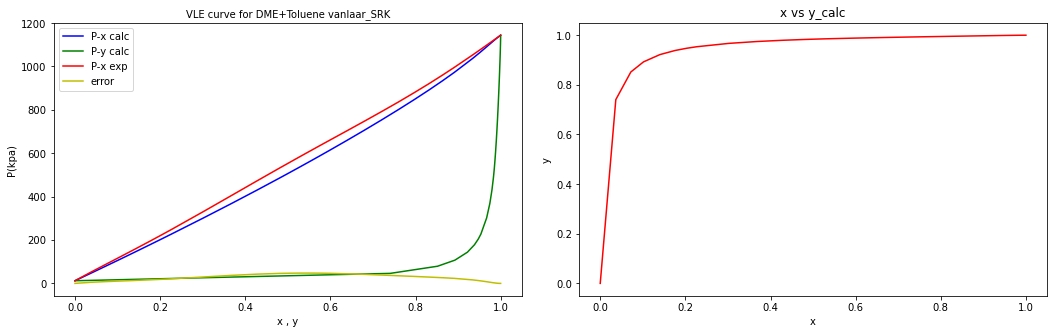

In [1]:
#DME+TOLUENE_Vanlaar_SRk
from numpy import log
import numpy as np
from numpy import exp
import matplotlib.pyplot as plt
import pandas as pd
import math

T=323.15
exp_x1=[0.0000,0.0366,0.0719,0.1016,0.1401,0.1758,0.2030,0.2268,0.3019,0.3681,0.4286,0.4806,0.4978,0.5240,0.5478,0.5573,0.5724,0.5975,0.6384,0.6800,0.7206,0.7599,0.7968,0.8314,0.8627,0.8910,0.9337,0.9502,0.9634,0.9740, 0.9813,0.9863,0.9908,0.9938,0.9968,0.9984, 1.000]
x1 = exp_x1
x2 = np.array([])
for i in x1:
    x2 = np.append(x2,1-i)     

#x2 = (1-x1)


P1sat = 1144230               
P2sat = 12220                  


# A12,A21 also are from park2007 paper

A12 = -0.0564                   
A21 = -0.9254

gamma1 = np.array([])
gamma2 = np.array([])

#vanlaar equations

for i in x1:
    gamma1 = np.append(gamma1,exp(A12*((A21*(1-i))/(A12*i+A21*(1-i)))**2))          
       
    gamma2 = np.append(gamma2,exp(A21*((A12*i)/(A12*i+A21*(1-i)))**2))
data = {'x1data' : x1, 'x2data': x2, 'g1data' : gamma1, 'g2data' : gamma2}       

df = pd.DataFrame(data)  
pd.set_option("display.precision", 6)   

#by using dataframes, we can access multiple values at the same time, it is representation in table form.


#SRK equation  #all Tc,Pc,omega for DME-dodecane are taken from google(NIST webbook)

# exponential terms
exp1 = np.repeat(1.0,37)
exp2 = np.repeat(1.0,37)
df['exp1']=pd.Series(exp1)
df['exp2']=pd.Series(exp2)

# critical temp
Tc1 = np.repeat(400,37)                                     
Tc2 = np.repeat(591.8,37)
df['Tc1'] = pd.Series(Tc1)
df['Tc2'] = pd.Series(Tc2)

# critical pressure
Pc1 = np.repeat(5240000,37)                                     
Pc2 = np.repeat(4110000,37)
df['Pc1'] = pd.Series(Pc1)
df['Pc2'] = pd.Series(Pc2)
R= 8.314

# acentric factor values
om1 = np.repeat(0.2,37)                                     
om2 = np.repeat(0.262,37)
df['omega1'] = pd.Series(om1)
df['omega2'] = pd.Series(om2)

al1 = np.array([])
a1 = np.array([])
b1 = np.array([])

al2 = np.array([])
a2 = np.array([])
b2 = np.array([])

# these are for calculating phi-sat, only change is in replacing Pinit by Psat

A1sat = np.array([])
A2sat = np.array([])
B1sat = np.array([])
B2sat = np.array([])

#these are alpha equation,a and b, taken from google for SRK equation

for i in df.index:
    al1= np.append(al1,(1+(0.48508+1.55171*df['omega1'][i]-0.15613*df['omega1'][i]**2)*(1-(T/df['Tc1'][i])**0.5))**2)
      
    a1 = np.append(a1,(0.42748*(R*df['Tc1'][i])**2)/(df['Pc1'][i]))                 
                                 
    b1= np.append(b1,(0.08664*R*df['Tc1'][i])/(df['Pc1'][i]))

    al2= np.append(al2,(1+(0.48508+1.55171*df['omega2'][i]-0.15613*df['omega2'][i]**2)*(1-(T/df['Tc2'][i])**0.5))**2)
      
    a2 = np.append(a2,(0.42748*(R*df['Tc2'][i])**2)/(df['Pc2'][i]))                 
                                 
    b2= np.append(b2,(0.08664*R*df['Tc2'][i])/(df['Pc2'][i]))

df['alpha1'] = pd.Series(al1)
df['a1'] = pd.Series(a1)
df['b1']=pd.Series(b1)
df['alpha2'] = pd.Series(al2)
df['a2'] = pd.Series(a2)
df['b2']=pd.Series(b2)

for i in df.index:
    A1sat = np.append(A1sat,df['alpha1'][i]*df['a1'][i]*P1sat/(R*T)**2)    
    A2sat = np.append(A2sat,df['alpha2'][i]*df['a2'][i]*P2sat/(R*T)**2)          
for i in df.index:
    B1sat = np.append(B1sat,((df['b1'][i])*P1sat/(R*T)))
    B2sat = np.append(B2sat,((df['b2'][i])*P2sat/(R*T)))

df['A1sat'] = pd.Series(A1sat)
df['B1sat'] = pd.Series(B1sat)
df['A2sat'] = pd.Series(A2sat)
df['B2sat'] = pd.Series(B2sat)
Za1sat = np.array([])
Za2sat = np.array([])

for i in df.index:

    Za1sat =np.append(Za1sat,np.roots([1,-1,df['A1sat'][i]-df['B1sat'][i]-(df['B1sat'][i])**2,-df['A1sat'][i]*df['B1sat'][i]]))
  
    
#we define Z for both components,it is cubic equation and we find roots

for i in df.index:    
    Za2sat =np.append(Za2sat,np.roots([1,-1,df['A2sat'][i]-df['B2sat'][i]-(df['B2sat'][i])**2,-df['A2sat'][i]*df['B2sat'][i]]))


#we get 3 roots for each conc of each component, but some are very small and complex, so we considered only bigger real values

#print(Za1sat)
#print(Za2sat)

Z1sat = np.array([])
for i in Za1sat:
    if i>=0.5:
        Z1sat = np.append(Z1sat,i) 
Z2sat = np.array([])
for i in range(len(Z1sat)):
        Z2sat = np.append(Z2sat,Za2sat.real[3*i])      

df['Z1sat'] = pd.Series(Z1sat)
df['Z2sat'] = pd.Series(Z2sat)

#thus phi can be found, all the correlations are available online for SRK equation

phi1_sat = np.array([])
phi2_sat = np.array([])

for i in df.index:
    phi1_sat =np.append(phi1_sat,exp((df['Z1sat'][i])-1.0-(log((df['Z1sat'][i])-(df['B1sat'][i])))-(((df['A1sat'][i])/(df['B1sat'][i])))*(log(1.0+((df['B1sat'][i])/(df['Z1sat'][i]))))))
for i in df.index:
    phi2_sat =np.append(phi2_sat,exp((df['Z2sat'][i])-1.0-(log((df['Z2sat'][i])-(df['B2sat'][i])))-(((df['A2sat'][i])/(df['B2sat'][i])))*(log(1.0+((df['B2sat'][i])/(df['Z2sat'][i]))))))

df['phi1sat'] = pd.Series(phi1_sat)
df['phi2sat'] = pd.Series(phi2_sat)


#initial guess values of phi

phi1_init = np.repeat(1.0,37)
phi2_init = np.repeat(1.0,37)   
df['phi1_init']=pd.Series(phi1_init)
df['phi2_init']=pd.Series(phi2_init)      

P1_init = np.array([])
P2_init = np.array([])

for i in df.index:
    P1_init =np.append(P1_init,((df['x1data'][i])*(df['g1data'][i])*P1sat*df['phi1sat'][i]*df['exp1'][i]/df['phi1_init'][i]))
    P2_init =np.append(P2_init,((df['x2data'][i])*(df['g2data'][i])*P2sat*df['phi2sat'][i]*df['exp2'][i]/df['phi2_init'][i]))

#P1 is written from P-x relations and y1 is also from our equations,these are also added to 'df' dataframe

df['P1data']=pd.Series(P1_init)      
df['P2data']=pd.Series(P2_init)
Pinit = df['P1data']+df['P2data']
df['Pinit'] = pd.Series(Pinit)

#compute y1 from initial P

y1 = np.array([])                          
for i in df.index:
    y1 = np.append(y1,df['P1data'][i]/df['Pinit'][i])          
df['y1data']=pd.Series(y1)

y2 = np.array([])
for i in y1:
    y2 = np.append(y2,1-i)
df['y2data']=pd.Series(y2)
#print(df)

# loop starts here


for j in df.index:
    
    
    while True:

      
#A and B for SRK equation
        
        A1 = np.array([])
        B1 = np.array([])
        A2 = np.array([])
        B2 = np.array([])
        
        for i in df.index:
                A1 =np.append(A1,df['alpha1'][i]*df['a1'][i]*df['Pinit'][i]/(R*T)**2)   

                A2 =np.append(A2,df['alpha2'][i]*df['a2'][i]*df['Pinit'][i]/(R*T)**2)   
      
        for i in df.index:
                B1 = np.append(B1,((df['b1'][i])*(df['Pinit'][i])/(R*T)))
                B2 = np.append(B2,((df['b2'][i])*(df['Pinit'][i])/(R*T)))
                

        df['A1'] = pd.Series(A1)
        df['B1'] = pd.Series(B1)
        df['A2'] = pd.Series(A2)
        df['B2'] = pd.Series(B2)
        Za1 = np.array([])
        Za2 = np.array([])


        for i in df.index:

            Za1 =np.append(Za1,np.roots([1,-1,df['A1'][i]-df['B1'][i]-(df['B1'][i])**2,-df['A1'][i]*df['B1'][i]]))
  
            
#we define Z for both components,it is cubic equation and we find roots
        
        for i in df.index:    
            Za2 =np.append(Za2,np.roots([1,-1,df['A2'][i]-df['B2'][i]-(df['B2'][i])**2,-df['A2'][i]*df['B2'][i]]))


#we get 3 roots for each conc of each component, but some are very small and complex, so considered only bigger real values
        
        
        Z1 = np.array([])
        for i in Za1:
            if i>=0.5:
                Z1 = np.append(Z1,i) 
        Z2 = np.array([])
        for i in range(len(Z1)):
                Z2 = np.append(Z2,Za2.real[3*i])      
        
        df['Z1'] = pd.Series(Z1)
        df['Z2'] = pd.Series(Z2)
        
#thus phi can be found, all the correlations are available online for SRK equation
        
        phi1_next = np.array([])
        phi2_next = np.array([])
        
        for i in df.index:
            phi1_next =np.append(phi1_next,exp((df['Z1'][i])-1.0-(log((df['Z1'][i])-(df['B1'][i])))-(((df['A1'][i])/(df['B1'][i])))*(log(1.0+((df['B1'][i])/(df['Z1'][i]))))))
        for i in df.index:
            phi2_next =np.append(phi2_next,exp((df['Z2'][i])-1.0-(log((df['Z2'][i])-(df['B2'][i])))-(((df['A2'][i])/(df['B2'][i])))*(log(1.0+((df['B2'][i])/(df['Z2'][i]))))))

        df['phi1_next']=pd.Series(phi1_next)
        df['phi2_next']=pd.Series(phi2_next)
        
        
        P1_next = np.array([])
        P2_next = np.array([])

        for i in df.index:
            P1_next =np.append(P1_next,((df['x1data'][i])*(df['g1data'][i])*P1sat*df['phi1sat'][i]*df['exp1'][i]/df['phi1_next'][i]))
            P2_next =np.append(P2_next,((df['x2data'][i])*(df['g2data'][i])*P2sat*df['phi2sat'][i]*df['exp2'][i]/df['phi2_next'][i]))

        df['P1next']=pd.Series(P1_next)
        df['P2next']=pd.Series(P2_next)
        Pnext = df['P1next']+df['P2next']
        df['Pnext'] = pd.Series(Pnext)

        y1next = np.array([])                          
        for i in df.index:
            y1next = np.append(y1next,df['P1next'][i]/df['Pnext'][i])          
        df['y1next']=pd.Series(y1next)
        
        y2next = np.array([])
        for i in y1next:
            y2next = np.append(y2,1-i)
        df['y2next']=pd.Series(y2next)
        
        
        deltaP = df['Pnext']-df['Pinit']
        df['deltaP'] = pd.Series(deltaP)
    
        finalP = np.array([])
        
#convergence criteria is approximated as 0.0001

# All the values(P,phi,y) get updated for each x value
        
        if df.loc[j,'deltaP']>0.0001:
            df['Pinit'] = df['Pinit'].replace(df['Pinit'][j],df['Pnext'][j])
            #print(df['Pnext'][j])
            #print(df['phi1_next'][j])
            #print(df['phi2_next'][j])
            #print(df['P1next'][j])
            #print(df['y1next'][j])

        else:
            break
#print(Z1,Z2)
#print(gamma1,gamma2)

#loop stops once difference in deltaP = 0.0001 Pa
                
# So,the final values after iteration are given in the table 'df2'. These values can be used to plot graphs


data2 ={'x1':df['x1data'],'phi1_final':df['phi1_next'],'phi2_final':df['phi2_next'],'y1final':df['y1next'],'Pfinal':df['Pnext'],'deltaP_aftritr':df['deltaP']}
df2 = pd.DataFrame(data2)

#print(df2)

x=y1next
y=(Pnext/1000)
z=x1
exp_p=[12.22,51.06,87.32,117.69,157.19,194.34,223.13,248.71,331.39,405.71,473.80,531.81,550.71,579.55,605.48,615.75,632.17,659.15,703.05,747.97,792.48,836.45,879.23,920.60,959.47,995.82,1052.62,1075.16,1093.36,1108.10,1118.20,1125.19,1131.44,1135.57,1139.80,1142.00,1144.23]

#print(len(exp_p))

#print(Pnext/1000)
error=(exp_p-(Pnext/1000))
#print(error)

sumsq = 0
for i in range(37):
    sumsq = sumsq + (error[i])**2
stdev = math.sqrt(sumsq/(len(exp_p)-1))
print("Standard deviation of predicted pressures of DME & toluene system at T=323.15 K based on Van Laar equation and Soave- Redlich Kwong Equation of State from experimental results (J. Chem. Eng. Data 2007, 52, 5, 1814–1818) is",stdev,"kPa")




fig=plt.figure(figsize=(15,5))
ax1=fig.add_subplot(121)
ax1.plot(z,y,'b-')

ax1.plot(x,y,'g-')
ax1.plot(exp_x1,exp_p,'r-')
ax1.plot(z,error,'y-')


ax1.set_title('VLE curve for DME+Toluene vanlaar_SRK',size=10)
ax1.set_xlabel('x , y')
ax1.set_ylabel('P(kpa)')
ax1.legend(labels=('P-x calc','P-y calc','P-x exp','error'),loc='upper left')

ax2=fig.add_subplot(122)
ax2.plot(z,x,'r-')

ax2.set_title('x vs y_calc')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
fig.tight_layout(pad=2.0)
plt.show()
               